## Домашнее задание 2 

In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sisi
import numpy as np
df_hw = pd.read_csv('Homework_2_data.csv', sep=';')
year = 2023
industry = 'СЕЛЬСКОЕ ХОЗЯЙСТВО'
region = 'все'
if industry == 'все':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.region == region)])
elif region == 'все':
    my_data = (df_hw[(df_hw.year == year) &
    (df_hw. industry == industry )])
my_data



,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
19,"Удмуртская Республика, Глазов и Глазовский район",2,"40,5",1,СЕЛЬСКОЕ ХОЗЯЙСТВО,8,50000,0,1,1,1,0,65,163,0,2023
37,"Удмуртская Республика, Глазов и Глазовский район",0,"42,5",1,СЕЛЬСКОЕ ХОЗЯЙСТВО,8,30000,0,1,0,1,1,72,168,0,2023
55,"Пермский край, Соликамск и Соликамский район",1,62,0,СЕЛЬСКОЕ ХОЗЯЙСТВО,12,20000,0,0,1,1,0,70,176,1,2023
96,"Волгоградская область, Руднянский район",1,35,1,СЕЛЬСКОЕ ХОЗЯЙСТВО,8,40000,0,1,1,1,0,64,163,0,2023
102,"Волгоградская область, Руднянский район",0,64,0,СЕЛЬСКОЕ ХОЗЯЙСТВО,12,15000,0,1,0,1,0,110,178,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,"Ленинградская область, Волосовский район",0,"37,5",1,СЕЛЬСКОЕ ХОЗЯЙСТВО,12,24000,0,0,1,1,0,71,167,1,2023
4460,"Ленинградская область, Волосовский район",0,49,0,СЕЛЬСКОЕ ХОЗЯЙСТВО,8,60000,0,1,1,1,0,80,173,1,2023
4474,"Ленинградская область, Волосовский район",1,"42,5",1,СЕЛЬСКОЕ ХОЗЯЙСТВО,8,58000,0,1,0,1,1,90,164,0,2023
4477,"Ленинградская область, Волосовский район",0,"55,5",1,СЕЛЬСКОЕ ХОЗЯЙСТВО,24,16400,0,1,0,1,1,90,170,0,2023


$$1$$

##### Опишите Вашу выборку. Что является в Вашем случае генеральной совокупностью? Как можно проверить репрезентативность Вашей выборки? (описать словами, не проверять)

Генеральная совокупность - жители всех регионов, занимающихся сельскохозяйственным делом 

Проверить репрезентативность выборки можно удостоверясь, что представлены все нужные для исследования подгруппы, посмотреть на распределения признаков и убедиться, что нет аномальных перекосов, в достаточном ли количестве представлены нужные для анализа подгруппы и т.д. Например тут можно было бы проверить например количество людей с детьми, если почти все такие, то очевидно, что выборка не репрезентативная. 

Далее выяснилось, что у каждого респондента есть хотя бы 1 ребенок, что выборка нерепрезентативна. 

In [2]:
data = pl.from_pandas(my_data) #привычнее с поларсом, скастим сразу во флоуты заменив запятые на точки 
true_data = data.with_columns(pl.col('age').str.replace(',', '.'), 
                                                     pl.col('wage').str.replace(',', '.'), 
                                                     pl.col('weight').str.replace(',', '.'), 
                                                     pl.col('height').str.replace(',', '.')
                                                     ).with_columns(
                                                         pl.col('age').cast(pl.Float64),
                                                        pl.col('wage').cast(pl.Float64), 
                                                        pl.col('weight').cast(pl.Float64),
                                                        pl.col('height').cast(pl.Float64))
true_data

region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
str,i64,f64,i64,str,i64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64
"""Удмуртская Республика, Глазов …",2,40.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,50000.0,0,1,1,1,0,65.0,163.0,0,2023
"""Удмуртская Республика, Глазов …",0,42.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,30000.0,0,1,0,1,1,72.0,168.0,0,2023
"""Пермский край, Соликамск и Сол…",1,62.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,20000.0,0,0,1,1,0,70.0,176.0,1,2023
"""Волгоградская область, Руднянс…",1,35.0,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,40000.0,0,1,1,1,0,64.0,163.0,0,2023
"""Волгоградская область, Руднянс…",0,64.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,15000.0,0,1,0,1,0,110.0,178.0,0,2023
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Ленинградская область, Волосов…",0,37.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,24000.0,0,0,1,1,0,71.0,167.0,1,2023
"""Ленинградская область, Волосов…",0,49.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,60000.0,0,1,1,1,0,80.0,173.0,1,2023
"""Ленинградская область, Волосов…",1,42.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,58000.0,0,1,0,1,1,90.0,164.0,0,2023


$$2$$

##### Рассчитайте описательные статистики(минимум, максимум, среднеез начение, стандартное отклонение, размах) для всех переменных в Вашей выборке кроме отрасли, региона и года.

In [3]:
filtered_stats = true_data.drop('industry', 'region', 'year').describe().filter(pl.col('statistic').is_in(['min', 'max', 'mean', 'std'])) #делаем чудесный метод describe 
#тут добавим строку размах 
min_stats = filtered_stats.filter(pl.col('statistic') == 'min').select(pl.exclude('statistic'))
max_stats = filtered_stats.filter(pl.col('statistic') == 'max').select(pl.exclude('statistic'))

range_values = (max_stats - min_stats)

range_row = range_values.insert_column(0, pl.lit('range').alias('statistic'))

final_stats = filtered_stats.vstack(range_row)
final_stats

statistic,educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",0.610294,46.698529,0.382353,10.147059,35192.580882,0.051471,0.852941,0.669118,1.0,0.235294,82.472059,170.404412,0.352941
"""std""",0.771461,9.584957,0.487759,4.482938,24811.262585,0.221772,0.355474,0.47227,0.0,0.425751,15.995535,8.673825,0.479651
"""min""",0.0,27.5,0.0,7.0,8591.0,0.0,0.0,0.0,1.0,0.0,46.0,150.0,0.0
"""max""",2.0,68.5,1.0,24.0,250000.0,1.0,1.0,1.0,1.0,1.0,130.0,198.0,1.0
"""range""",2.0,41.0,1.0,17.0,241409.0,1.0,1.0,1.0,0.0,1.0,84.0,48.0,1.0


$$3$$

##### Оцените квартили (25%, 50%, 75%) распределения для количественных переменных в выборке. Определите межквартильный размах.

Заметим, что количественные переменные только age, work_hours, wage, weight и height. Остальные, качественные, а year вообще везде один 

In [4]:
numeric = true_data.select('age', 'work_hours', 'wage', 'weight', 'height')
filtered_stats = numeric.describe().filter(pl.col('statistic').is_in(['25%', '50%', '75%'])) #делаем чудесный метод describe
min_stats = filtered_stats.filter(pl.col('statistic') == '25%').select(pl.exclude('statistic'))
max_stats = filtered_stats.filter(pl.col('statistic') == '75%').select(pl.exclude('statistic'))

range_values = (max_stats - min_stats)

range_row = range_values.insert_column(0, pl.lit('IQR').alias('statistic'))

final_stats = filtered_stats.vstack(range_row)
final_stats

statistic,age,work_hours,wage,weight,height
str,f64,f64,f64,f64,f64
"""25%""",39.0,8.0,20000.0,70.0,165.0
"""50%""",47.0,8.0,31000.0,80.0,170.0
"""75%""",53.5,11.0,40000.0,93.0,176.0
"""IQR""",14.5,3.0,20000.0,23.0,11.0


$$4$$

##### Сравните среднее значение, медиану и моду для количественных переменных в выборке. Что можно сказать об их соотношении?

In [5]:
filtered_stats = numeric.describe().filter(pl.col('statistic').is_in(['mean', '50%'])) #делаем чудесный метод describe
range_values = numeric.select(pl.all().mode().first())
range_row = range_values.insert_column(0, pl.lit('mode').alias('statistic'))
final_stats = filtered_stats.vstack(range_row.with_columns(pl.col('work_hours').cast(pl.Float64)))
final_stats

statistic,age,work_hours,wage,weight,height
str,f64,f64,f64,f64,f64
"""mean""",46.698529,10.147059,35192.580882,82.472059,170.404412
"""50%""",47.0,8.0,31000.0,80.0,170.0
"""mode""",44.0,8.0,40000.0,90.0,176.0


[[<matplotlib.axis.XTick at 0x16e99b230>,
 [Text(0, 0, 'mean'), Text(1, 0, 'median'), Text(2, 0, 'mode')]]

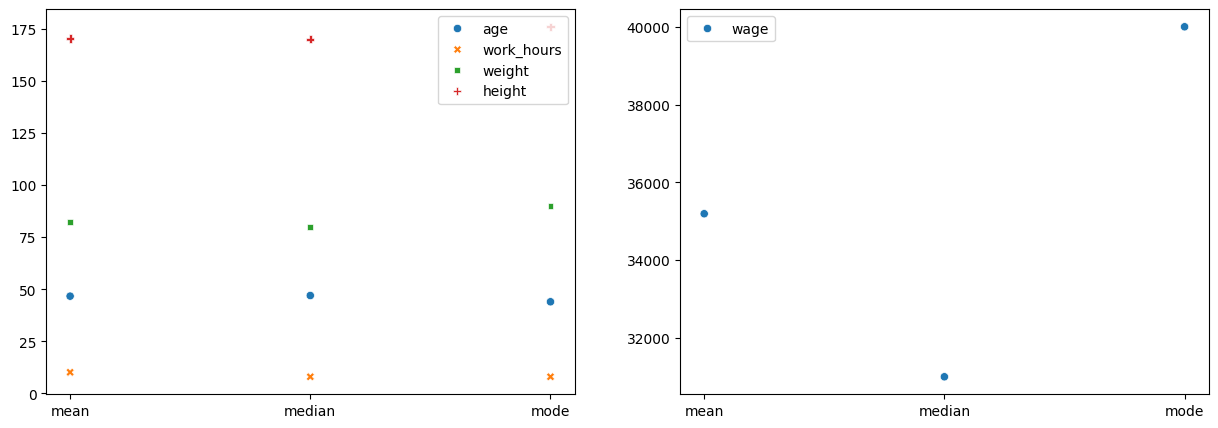

In [6]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(final_stats.drop('wage').to_pandas(), ax=ax1
            ).set(xticks=([0, 1, 2]), xticklabels=(['mean', 'median', 'mode']))
sns.scatterplot(final_stats.select('wage').to_pandas(), ax=ax2
            ).set(xticks=([0, 1, 2]), xticklabels=(['mean', 'median', 'mode']))

$$5$$

##### Постройте box–plot для всех количественных переменных. Есть ли выбросы?

[Text(0.5, 1.0, 'boxplots of height feature'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'height')]

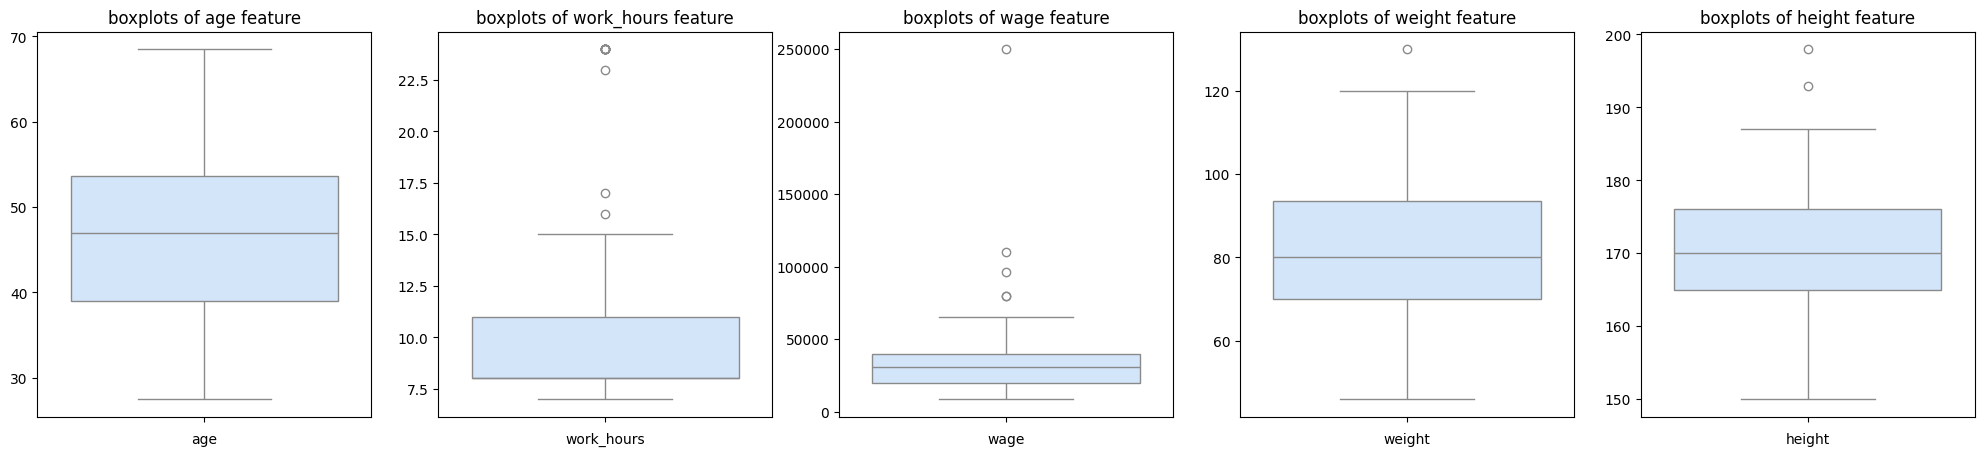

In [7]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))
sns.boxplot(data=numeric['age'].to_pandas(),
            ax=ax1, color='#CCE5FF').set(title='boxplots of age feature', ylabel='', xlabel='age')
sns.boxplot(data=numeric['work_hours'].to_pandas(),
            ax=ax2, color='#CCE5FF').set(title='boxplots of work_hours feature', ylabel='', xlabel='work_hours')
sns.boxplot(data=numeric['wage'].to_pandas(),
            ax=ax3, color='#CCE5FF').set(title='boxplots of wage feature', ylabel='', xlabel='wage')
sns.boxplot(data=numeric['weight'].to_pandas(),
            ax=ax4, color='#CCE5FF').set(title='boxplots of weight feature', ylabel='', xlabel='weight')
sns.boxplot(data=numeric['height'].to_pandas(),
            ax=ax5, color='#CCE5FF').set(title='boxplots of height feature', ylabel='', xlabel='height')

Как видим, выбросы присутствут везде, кроме age (по мнению ящиков с усами, которые считают межквантильный и обзывают выбросами все что выше (ниже) $q_3 + 1.5 IQR \ \ \ (q_1 - 1.5IQR)$)

$$6$$

##### Постройте гистограммы распределения для количественных переменных в выборке. Что можно сказать о скошенности (асимметрии) и островершинности их распределений? Рассчитайте соответствующие показатели (Skewness и Kurtosis) и сделайте выводы.

<Axes: xlabel='height', ylabel='Count'>

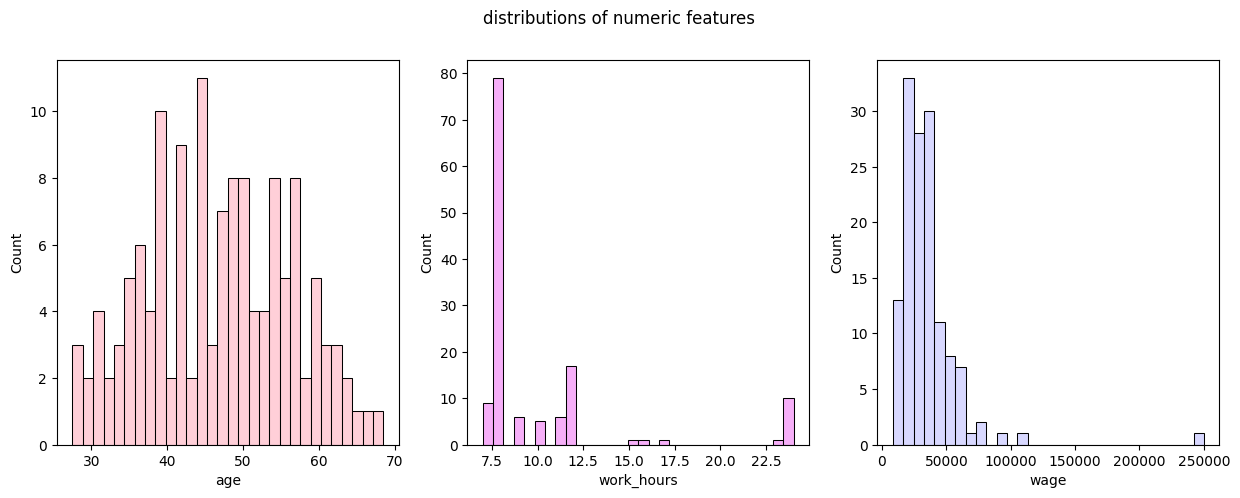

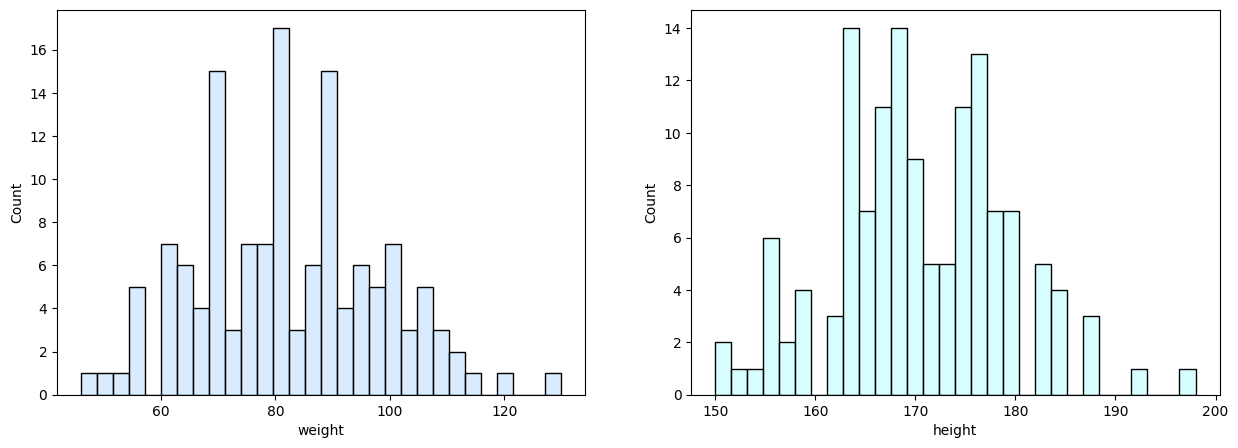

In [8]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig2, (ax11, ax21) = plt.subplots(1, 2, figsize=(15, 5))
fig1.suptitle('distributions of numeric features')
sns.histplot(true_data, 
             x='age',
             bins=30,
             ax=ax1,
             color='pink')
sns.histplot(true_data, 
             x='work_hours',
             bins=30,
             ax=ax2,
             color='#F394F6')
sns.histplot(true_data, 
             x='wage',
             bins=30,
             ax=ax3,
             color='#CCCCFF')
sns.histplot(true_data, 
             x='weight',
             bins=30,
             ax=ax11,
             color='#CCE5FF')
sns.histplot(true_data, 
             x='height',
             bins=30,
             ax=ax21,
             color='#CCFFFF')

In [9]:
skewness = sisi.skew(numeric)
kurtosis = sisi.kurtosis(numeric)
print('skewness')
print(f'age: {skewness[0]}, work_hours: {skewness[1]}, wage: {skewness[2]}, weight: {skewness[3]}, height: {skewness[4]}')
print('kurtosis')
print(f'age: {kurtosis[0]}, work_hours: {kurtosis[1]}, wage: {kurtosis[2]}, weight: {kurtosis[3]}, height: {kurtosis[4]}')

skewness
age: 0.045227780713544434, work_hours: 2.342415174665785, wage: 5.186502223448748, weight: 0.18672816740816797, height: 0.1531837764748078
kurtosis
age: -0.8025099204977688, work_hours: 4.432574526030525, wage: 40.14905230420213, weight: -0.30356382626107514, height: 0.13845845501543952


1) Можно сделать вывод, что age, weight и height близки к симметричным распределениям, так как skewness около нуля, для work_hours и wage получаем, что правый хвост "тяжелее" и распределение не близко к симметричному, что мы и видим на гистограммах.

2) Так как в сипае эксцесс считается в смысле определения Фишера, то можем интерпретировать его как остроту пика. Таким образом, age, work_hours более плоские чем нормальное распределение, height чуть более крутой, work_hours еще острее, а самый острый wage, что так же очевидно из гистограммы распределений 


$$7$$

Как распределены респонденты в Вашей выборке по уровню образования? Постройте гистограмму.

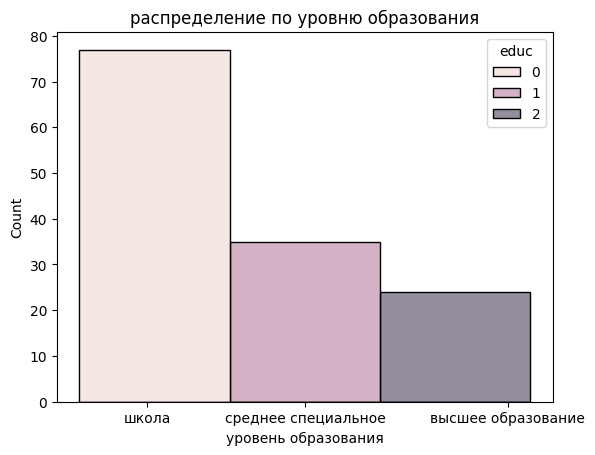

In [10]:
sns.histplot(true_data.to_pandas(), 
             x='educ',
             bins=3,
             color='pink', hue='educ').set(xticks=([0.3, 1, 1.9]), 
                                           xticklabels=(['школа', 'среднее специальное', 'высшее образование']), 
                                           xlabel='уровень образования',
                                           title='распределение по уровню образования')
plt.show()

Ну как видим, большинство респондентов закончили только школу, что логично для этой области 

$$8$$
##### Постройте корреляционную таблицу для всех переменных в Вашей выборке кроме отрасли, региона и года. Проинтерпретируйте результаты.


In [11]:
true_data.select('is_children').n_unique()

1

Как видим, в нашей выборке у всех респондентов нет детей, поэтому не будем их учитывать в корреляционной матрице и кстати это говорит о томб что выборка не очень репрезентативна 

[Text(0.5, 1.0, 'heatmap of correlation between features')]

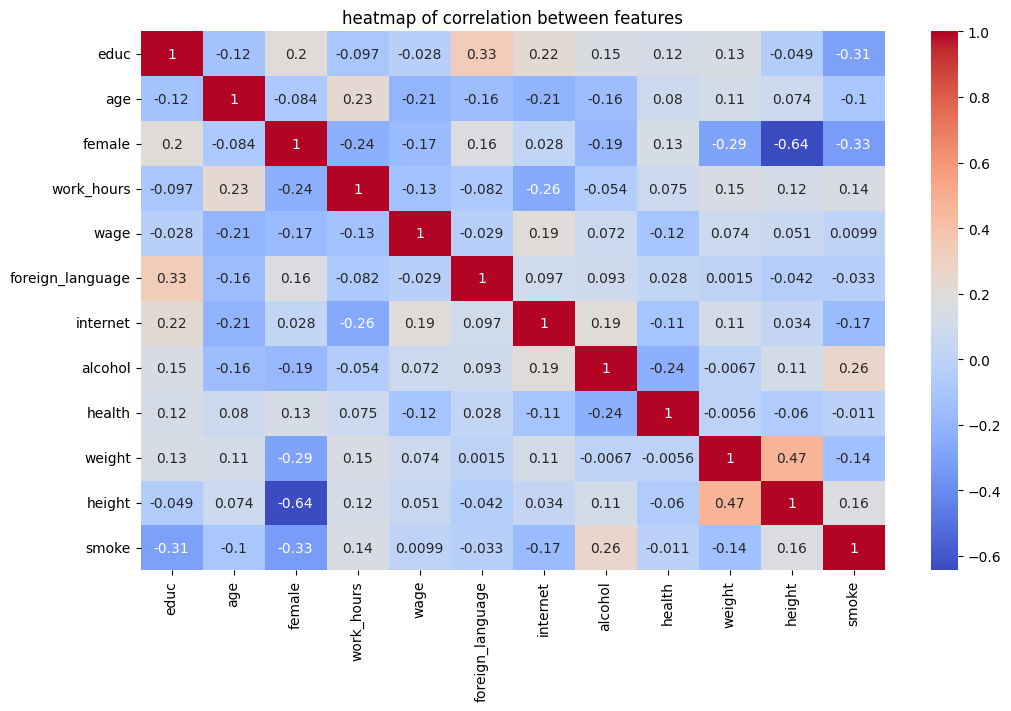

In [12]:
fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
corrmat = true_data.drop('industry', 'region', 'year', 'is_children').corr()
sns.heatmap(corrmat.to_pandas(), annot=True, ax=ax, cmap="coolwarm", 
            yticklabels=['educ', 'age', 'female', 'work_hours', 'wage', 'foreign_language', 'internet', 'alcohol', 'health', 'weight', 'height', 'smoke']).set(title='heatmap of correlation between features')

$$9$$
##### Предположите зависимость заработной платы от каких-либо переменных в файле. Постройте графики, которые позволяют продемонстрировать эту зависимость

[None]

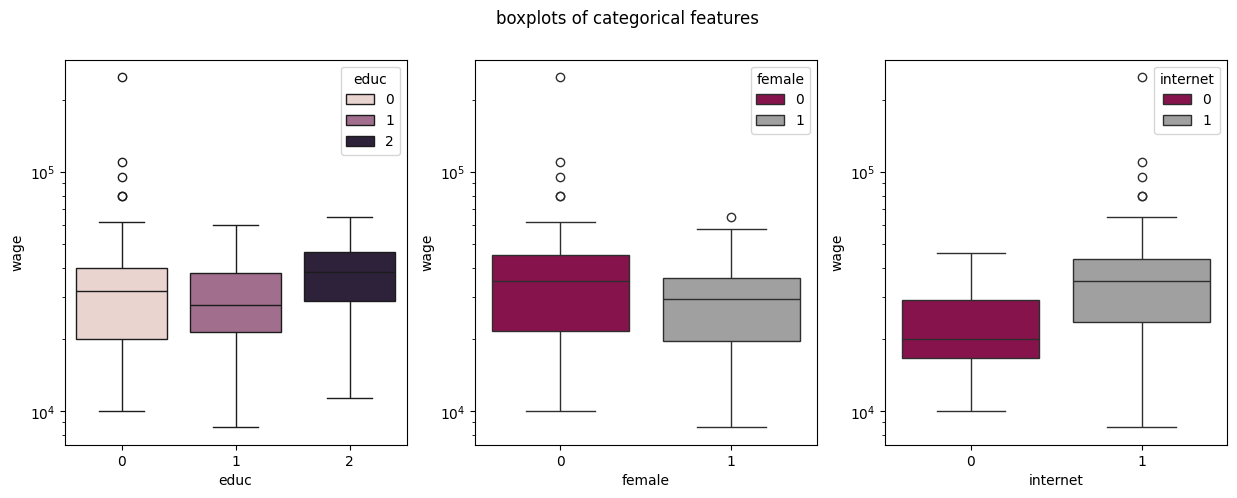

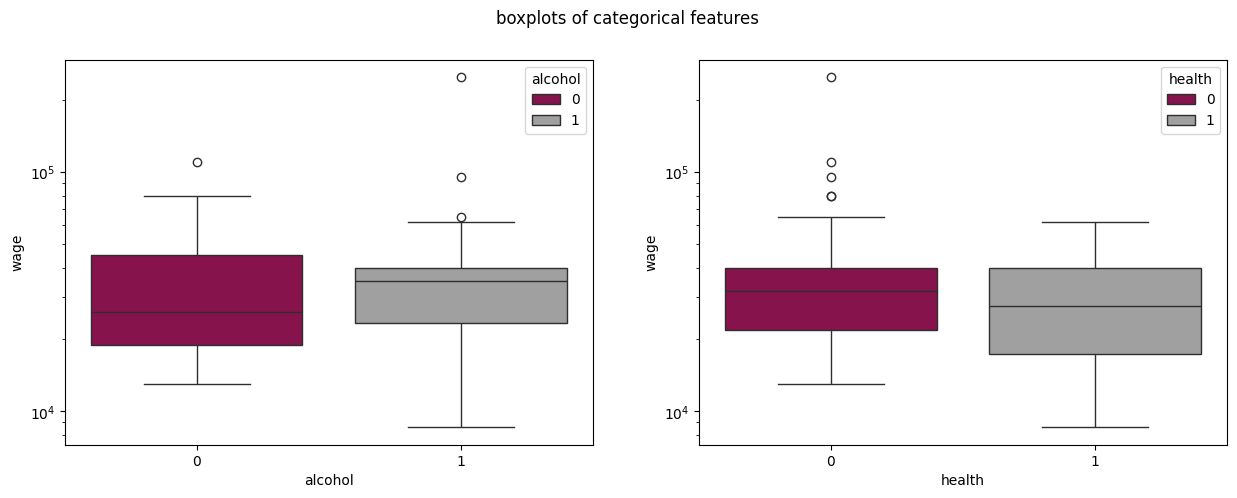

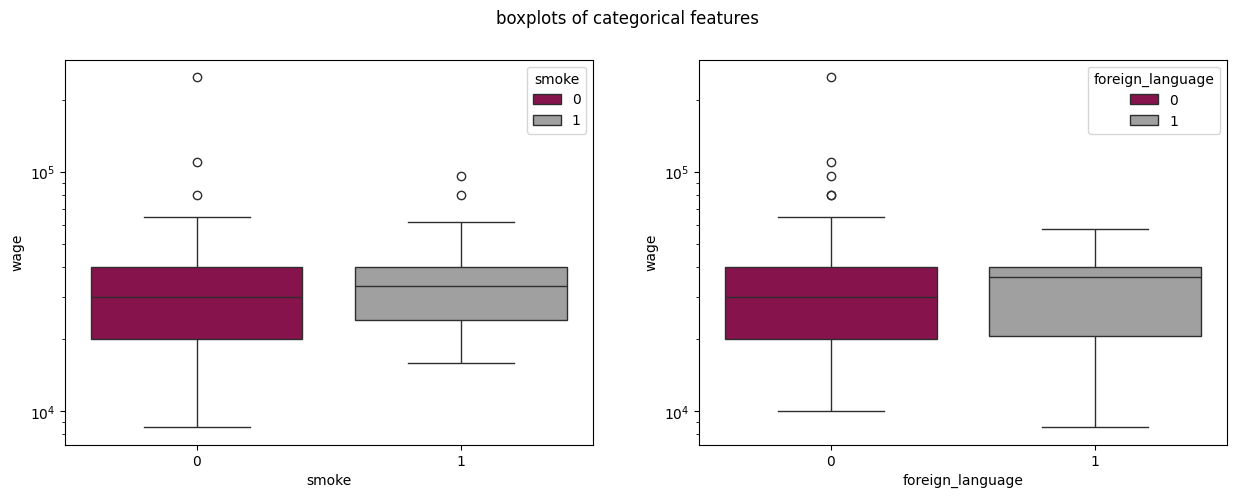

In [13]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig2, (ax11, ax21) = plt.subplots(1, 2, figsize=(15, 5))
fig3, (ax31, ax41) = plt.subplots(1, 2, figsize=(15, 5))
fig1.suptitle('boxplots of categorical features')
fig2.suptitle('boxplots of categorical features')
fig3.suptitle('boxplots of categorical features')
palette = {0: "#99004C", 1: "#A0A0A0"}
sns.boxplot(true_data,
            x='educ',
            y='wage',
            hue='educ',
            ax=ax1).set(yscale='log')
sns.boxplot(true_data,
            x='female',
            y='wage',
            hue='female',
            palette=palette,
            ax=ax2).set(yscale='log')
sns.boxplot(true_data,
            x='internet',
            y='wage',
            hue='internet',
            palette=palette,
            ax=ax3).set(yscale='log')
sns.boxplot(true_data,
            x='alcohol',
            y='wage',
            hue='alcohol',
            palette=palette,
            ax=ax11).set(yscale='log')
sns.boxplot(true_data,
            x='health',
            y='wage',
            hue='health',
            palette=palette,
            ax=ax21).set(yscale='log')
sns.boxplot(true_data,
            x='smoke',
            y='wage',
            hue='smoke',
            palette=palette,
            ax=ax31).set(yscale='log')
sns.boxplot(true_data,
            x='foreign_language',
            y='wage',
            hue='foreign_language',
            palette=palette,
            ax=ax41).set(yscale='log')

<Axes: xlabel='work_hours', ylabel='wage'>

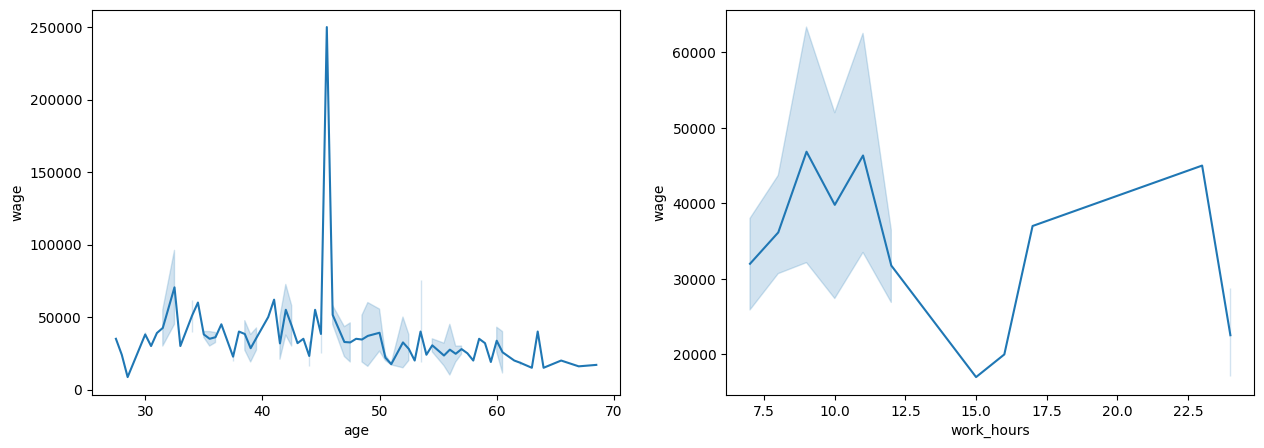

In [14]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(numeric, 
             x='age',
             y='wage',
             ax=ax1)
sns.lineplot(numeric, 
             x='work_hours',
             y='wage',
             ax=ax2)

Очевидно, что для weight и height никакой адекватной зависимости не будет, по ящикам с усами же кажется, что влиятельные категориальные признаки: образование, пол и интернет

$$10$$
##### Оцените линейную модель, которая объясняет заработную плату (wage) возрастом (age), наличием высшего образования (high), полом (female), наличием детей (is_children), курением (smoke) и константой. Проинтерпретируйте полученные результаты. Все ли коэффициенты оказались значимы? Выпишите уравнение оцененной модели.


In [15]:
true_data.insert_column(0, true_data['is_children'].alias('constant')).drop('is_children') #Превратим столбец is_children в константу потому что все чуваки с детьми

constant,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,health,weight,height,smoke,year
i64,str,i64,f64,i64,str,i64,f64,i64,i64,i64,i64,f64,f64,i64,i64
1,"""Удмуртская Республика, Глазов …",2,40.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,50000.0,0,1,1,0,65.0,163.0,0,2023
1,"""Удмуртская Республика, Глазов …",0,42.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,30000.0,0,1,0,1,72.0,168.0,0,2023
1,"""Пермский край, Соликамск и Сол…",1,62.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,20000.0,0,0,1,0,70.0,176.0,1,2023
1,"""Волгоградская область, Руднянс…",1,35.0,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,40000.0,0,1,1,0,64.0,163.0,0,2023
1,"""Волгоградская область, Руднянс…",0,64.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,15000.0,0,1,0,0,110.0,178.0,0,2023
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""Ленинградская область, Волосов…",0,37.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",12,24000.0,0,0,1,0,71.0,167.0,1,2023
1,"""Ленинградская область, Волосов…",0,49.0,0,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,60000.0,0,1,1,0,80.0,173.0,1,2023
1,"""Ленинградская область, Волосов…",1,42.5,1,"""СЕЛЬСКОЕ ХОЗЯЙСТВО""",8,58000.0,0,1,0,1,90.0,164.0,0,2023


In [16]:
regression1_data = true_data.select('constant', 'wage', 'educ', 'age', 'female', 'smoke')
regression1_data = regression1_data.with_columns(pl.when(pl.col('educ') == 2).then(1).otherwise(0).alias('high')).drop('educ')
regression1_data

constant,wage,age,female,smoke,high
i64,f64,f64,i64,i64,i32
1,50000.0,40.5,1,0,1
1,30000.0,42.5,1,0,0
1,20000.0,62.0,0,1,0
1,40000.0,35.0,1,0,0
1,15000.0,64.0,0,0,0
…,…,…,…,…,…
1,24000.0,37.5,1,1,0
1,60000.0,49.0,0,1,0
1,58000.0,42.5,1,0,0


In [17]:
y = regression1_data['wage']
X = regression1_data.drop('wage',)

In [18]:
import statsmodels.api as sm # type: ignore
model = sm.OLS(y.to_pandas(), X.to_pandas()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.052
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0192
Time:                        09:54:22   Log-Likelihood:                -1562.6
No. Observations:                 136   AIC:                             3135.
Df Residuals:                     131   BIC:                             3150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    6.859e+04   1.15e+04      5.982      0.0

Как видим не все коэффициенты получились значимыми, у high и smoke высокие p-value $\Rightarrow$ мы не отвергаем для них гипотезу о незначимости $H_0$. Для остальных же говорим, что коэффициенты значимы (точнее не отвергаем гипотезу $H_1$) например на 5% уровне значимости (коэффициент female незначим на 1% уровне значимости, поэтому он жиденький)

Почему-то коэффициент при образовнии модель считает незначимым, возможно это из-за выбросов (спойлер: да)

In [19]:
print(f'Уравнение модели: wage = {model.params['constant']} - {abs(model.params['age'])} * age - {abs(model.params['female'])} * female - {abs(model.params['smoke'])} * smoke + {abs(model.params['high'])} * high')

Уравнение модели: wage = 68591.02456678305 - 598.6033509866038 * age - 11104.683088308295 * female - 4157.048819738058 * smoke + 1521.808540531828 * high


Как видно модель считает, что зарплата отрицательно зависит от увеличения возраста (при увеличении на 1 год зп падает на 600 рублей), от того, женщина ли человек или нет (у женщин примерно на 11000 рублей зп меньше), отрицательно от курения (курящие зарабатывают примерно на 4157 рублей меньше), а так же положительно от высшего образования (респонденты с вышем образованием получают примерно на 1521 рубль больше)

$$11$$
##### Выполните тест на адекватность этой модели и сделайте выводы.

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.052
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0192
Time:                        09:54:22   Log-Likelihood:                -1562.6
No. Observations:                 136   AIC:                             3135.
Df Residuals:                     131   BIC:                             3150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    6.859e+04   1.15e+04      5.982      0.0

Как видим p-value около 0.02, то есть модель адекватная на уровне значимости например 5%, но неадекватна на чуть меньшем уровне значимости 

$$12$$
##### Сформулируйте и протестируйте гипотезу для одного из коэффициентов модели. Дайте содержательную и количественную интерпретацию полученных результатов.

Гипотеза $$H_0: age = 100 \\ H_1: age \neq 100$$

In [21]:
from scipy.stats import t

coef = model.params['age']
std_err = model.bse['age']

t_value = (coef - 100) / std_err

df = model.df_resid

p_value = 2 * (1 - t.cdf(abs(t_value), df))
print(p_value)
print(t_value)

0.0018903693457301696
-3.1712938046955483


С таким p-value получаем, что гипотеза $H_1$ не отвергается на любом разумном уровне значимости, действительно, по модели и по EDA видно, что между wage и age отрицательная корреляция, поэтому мы отвергаем гипотезу $H_0$ 

$$13$$
##### Сформулируйте и протестируйте гипотезу о нескольких коэффициентах модели. Дайте содержательную и количественную интерпретацию полученных результатов

Гипотеза $$H_0: age + female = -12000 \\ H_1: age + female \neq -12000$$

In [22]:
beta_age = model.params['age']
beta_female = model.params['female']

a = -12000

beta_sum = beta_age + beta_female

cov_matrix = model.cov_params()

se_sum = np.sqrt(cov_matrix.loc['age', 'age'] + cov_matrix.loc['female', 'female'] + 2 * cov_matrix.loc['age', 'female'])

t_stat = (beta_sum - a) / se_sum

p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

print(f"Т-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

Т-статистика: 0.0650
p-значение: 0.9483


Таким образом, гипотеза $H_0$ не отвергается на любом разумном уровне значимости, что соответствует коэффциентам в действительности. Получается, что при прочих равных женщина, на 1 год старше мужчины будет зарабатывать на 12000 рублей меньше. 

$$14$$
##### Постройте график «остатки–прогнозы». Сделайте вывод.


[Text(0.5, 0, 'fitted_values'),
 Text(0, 0.5, 'values'),
 Text(0.5, 1.0, 'fitted values - residuals graph')]

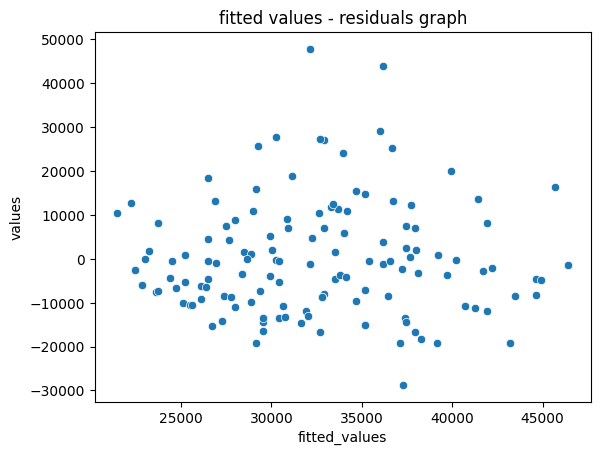

In [39]:
fitted_values = model.fittedvalues
residuals = model.resid

# Создание DataFrame для удобства
df = pd.DataFrame({
    'Fitted Values': fitted_values,
    'Residuals': residuals,
})
sns.scatterplot(df, x='Fitted Values', y='Residuals'
                ).set(xlabel='fitted_values', ylabel='values', title='fitted values - residuals graph')

1. Остатки рандомизированно распределены вокруг нуля, что показывает, что модель не имеет систематической ошибки.

2. Разброс признаков увеличивается с ростом прогноза, поэтому можно допустить наличие гетероскедастичности, то есть разные дисперсии.

3. Так же можно увидеть очень большие остатки, что характеризиует выбросы нашей выборки 


$$15$$

##### Оцените модель из п. 10, оставив в ней только значимые коэффициенты. Выпишите уравнение оцененной модели. Сравните результаты с моделью из п. 10. Какие критерии для сравнения моделей здесь стоит использовать?

Пусть уровень значимости 5% (на нем модель адекватная +-)

Тогда значимые признаки: age и female (и константа очев)

In [24]:
X_new = X.drop('smoke', 'high')
model = sm.OLS(y.to_pandas(), X_new.to_pandas()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     5.647
Date:                Fri, 22 Nov 2024   Prob (F-statistic):            0.00443
Time:                        09:54:22   Log-Likelihood:                -1563.1
No. Observations:                 136   AIC:                             3132.
Df Residuals:                     133   BIC:                             3141.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    6.575e+04   1.06e+04      6.223      0.0

In [25]:
print(f'Уравнение модели: wage = {model.params['constant']} - {abs(model.params['age'])} * age - {abs(model.params['female'])} * female')

Уравнение модели: wage = 65746.66579211761 - 575.354025037826 * age - 9640.04105216846 * female


Сравнение моделей:

1) $R^2$ и $R^2_{adj}$

Первая модель: $R^2 = 0.085, \ R^2_{adj} = 0.057$

Вторая модель: $R^2 = 0.078, \ R^2_{adj} = 0.064$

Видно, что обычный $R^2$ упал, в то время така $R^2_{adj}$ повысился, что означает, что ненужные признаки повысили обычный $R^2$ в первой модели, но вторая без них лучше объясняет дисперсию

2) AIC и BIC

Первая модель: $AIC = 3135, \ BIC = 3150$

Вторая модель: $AIC = 3132, \ BIC =3141$

Модель без незначимых признаков, хоть и несильно, но лучше, чем исходная модель 

3) F-тест

Первая модель: Prob (F-statistic) = 0.0192

Вторая модель: Prob (F-statistic) = 0.00443

Таким образом, по F-критерию вторая модель намного лучше и адекватна на любом разумном уровне значимости 

$$16$$

##### Протестируйте наличие выбросов в модели с помощьюи звестных Вам методов. Если они есть, то как их учесть в модели? Проведите коррекцию.


In [26]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
dffits = influence.dffits[0] 

n = len(data)    
p = X_new.shape[1]     

critical_value = 2 * np.sqrt(p / n)

sr = pl.DataFrame({'standardized_residuals': standardized_residuals, 'DFFITS': dffits}).with_row_index()
sr = sr.filter((abs(pl.col('standardized_residuals')) <= -2).or_(abs(pl.col('DFFITS')) > critical_value))
regression1_data.with_row_index().filter(pl.col('index').is_in(sr['index']))

index,constant,wage,age,female,smoke,high
u32,i64,f64,f64,i64,i64,i32
56,1,110000.0,53.5,0,0,0
85,1,250000.0,45.5,0,0,0
96,1,96000.0,32.5,0,1,0


Получили индексы выбросов по DFFITS и стюдентизированным остаткам 

Скорректируем датасет и удалим эти выбросы 


In [27]:
regression2_data = regression1_data.with_row_index().filter(pl.col('index').is_in(sr['index']).not_()).drop('index')
X = regression2_data.drop('wage')
y = regression2_data.select('wage')
model = sm.OLS(y.to_pandas(), X.to_pandas()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     6.438
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           9.42e-05
Time:                        09:54:22   Log-Likelihood:                -1448.0
No. Observations:                 133   AIC:                             2906.
Df Residuals:                     128   BIC:                             2920.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    5.648e+04   6350.429      8.894      0.0

Невероятно но факт, теперь в исходной модели на 10%-м уровне значимости значим коэффициент об образовании, что логично, так как все люди в выбросах были без образования и зарабатывали сильно больше среднего. Увеличился $R^2_adj$ и упали AIC и BIC, модель стала намного более адекватной 

Поэтому новую модель теперь оценим еще раз только на 10-м уровне значимости, чтобы добавился коэффициент при образовании 

In [28]:
X_new = X.drop('smoke')
y_new = y
model = sm.OLS(y_new.to_pandas(), X_new.to_pandas()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.599
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.02e-05
Time:                        09:54:22   Log-Likelihood:                -1448.0
No. Observations:                 133   AIC:                             2904.
Df Residuals:                     129   BIC:                             2916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    5.727e+04   5933.470      9.652      0.0

Получили улучшение модели по всем нужным метрикам

$$17$$

##### Постройте прогноз заработной платы для одного индивида с заданными вами характеристиками для него. Постройте 95% доверительный интервал для прогнозного значения.

In [29]:
Nikita = pl.DataFrame({
    'constant': 1,        
    'age': 21,  
    'female': 0,
    'high': 1
})
prediction = model.get_prediction(Nikita.to_pandas())

prediction.summary_frame(alpha=0.05)  

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,52195.639949,4162.542822,43959.947029,60431.33287,24915.630085,79475.649814


Получаем, что з/п Никиты лежит в пределах от 24916 до 79476 рублей в 95 случаях из 100

Предсказание же для Никиты: 52196 рублей 